In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.linalg as la

## Task 1

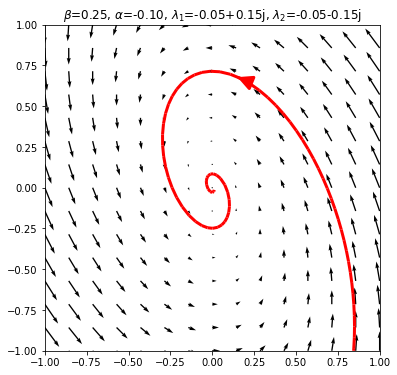

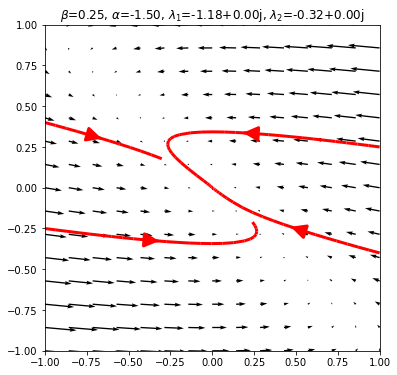

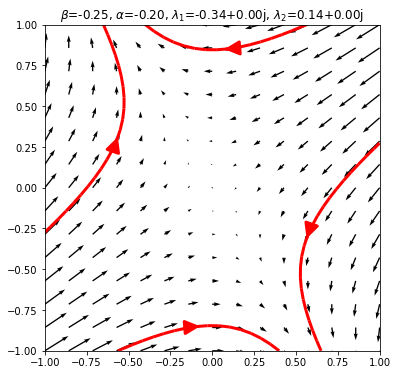

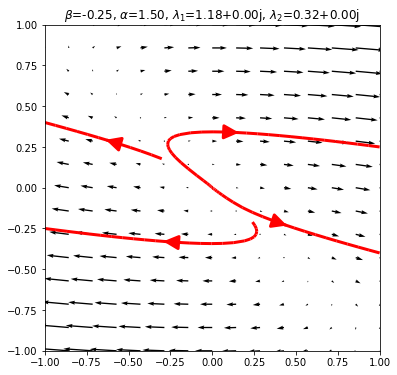

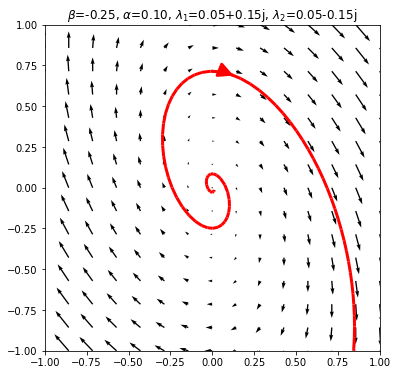

In [2]:

x_lim = (-1, 1)
y_lim = (-1, 1)

#two different resolutions, one for the vector field using quiver, and one for the trajectory using streamplot
resolution_traj = 100
resolution_vec = 15

x_traj, y_traj = np.meshgrid(np.linspace(x_lim[0], x_lim[1], resolution_traj), np.linspace(y_lim[0], y_lim[1], resolution_traj))
x_vec, y_vec = np.meshgrid(np.linspace(x_lim[0], x_lim[1], resolution_vec), np.linspace(y_lim[0], y_lim[1], resolution_vec))


alpha = [-0.1, -1.5, -0.2, 1.5, 0.1] #these alpha and beta values depict each of the five cases derived in the report
beta = [0.25, 0.25, -0.25, -0.25, -0.25]

def f(x, y, alpha, beta):
    u = alpha * x + alpha * y
    v = beta * x
    return u, v

#starting points for the plotting of single trajectories
starts = [
    [[0.85,-0.85]], #only one start point since spiral expected
    [[1.0,-0.4], [-1.0,-0.25], [1.0,0.25], [-1.0,0.4]], #four start points since node expected
    [[0.65,-1.0], [0.4,-1.0], [-0.65,1.0], [-0.4,1.0]], #four start points since saddle point expected
    [[1.0,-0.4], [-1.0,-0.25], [1.0,0.25], [-1.0,0.4]], #four start points since node expected
    [[0.85,-0.85]]] #only one start point since spiral expected

#loop over alpha values
for i in range(len(alpha)):
    #create figure
    fig, ax = plt.subplots(figsize=(6,6))
    #plot vector field
    ax.quiver(x_vec, y_vec, f(x_vec, y_vec, alpha[i], beta[i])[0], f(x_vec, y_vec, alpha[i], beta[i])[1])
    #plot trajectory from defined starting point
    ax.streamplot(x_traj, y_traj, f(x_traj, y_traj, alpha[i], beta[i])[0], f(x_traj, y_traj, alpha[i], beta[i])[1], start_points=starts[i], color="red", linewidth=3, arrowsize=3)
    #calculate eigenvalues
    A = np.array([[alpha[i], alpha[i]], [beta[i], 0.0]])
    eigs = la.eigvals(A)
    #set title
    ax.set_title("$β$={:.2f}, $α$={:.2f}, $λ_1$={:.2f}, $λ_2$={:.2f}".format(beta[i], alpha[i], eigs[0], eigs[1]))
    #save plot as file
    plt.savefig("task1/hyperbolic_phase_portrait_{i}.pdf".format(i=i))
    #show plot
    plt.show()
